In [4]:
from google.colab import files
uploaded = files.upload()

Saving Training Data_Case 3.csv to Training Data_Case 3.csv


In [119]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from scipy.optimize import minimize

df = pd.read_csv("Training Data_Case 3.csv")
df = df.rename(columns={'Unnamed: 0': 'date'})
df.set_index('date', inplace=True)

# Calculate the number of rows in df_train
train_size = int(len(df) * 0.95)

# Split the data into df_train and df_test
df_train = df.iloc[:train_size]
df_test = df.iloc[train_size:]

print(df.head())

           A       B      C      D      E      F      G      H      I       J
date                                                                         
1     119.96  198.25  76.54  32.08  53.20  19.47  40.63  43.47  19.76  113.91
2     120.32  201.42  76.73  31.86  53.88  19.23  40.47  45.16  19.88  112.98
3     119.60  200.23  77.60  31.56  55.11  18.93  39.84  46.03  20.29  114.24
4     121.76  199.61  79.48  31.62  55.80  19.15  40.13  46.89  20.01  114.27
5     120.10  199.64  81.49  31.89  55.02  19.16  39.94  47.59  20.12  113.87


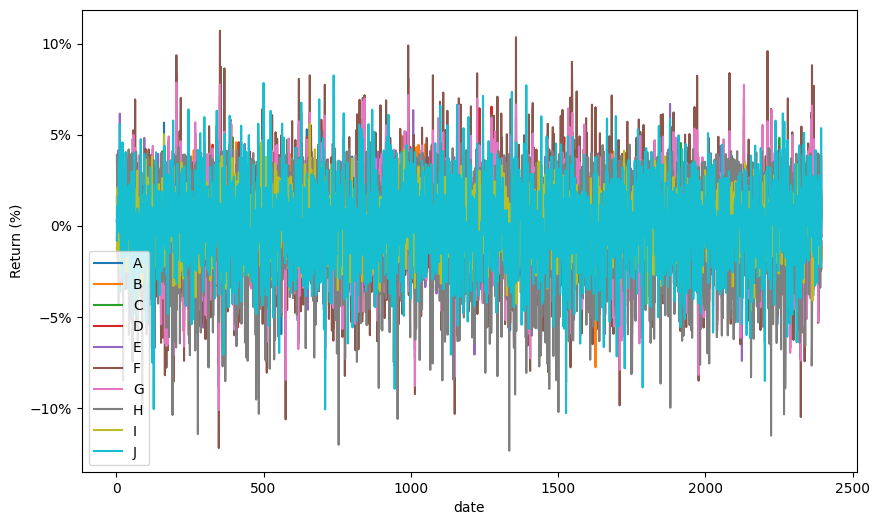

In [120]:
# Plot the returns for each asset
returns = df_train / df_train.shift() - 1

# drop the first row as it will have NaN values
returns = returns.dropna()

ax = returns.plot(figsize=(10, 6))
ax.set_ylabel('Return (%)')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=0))
plt.show()

In [125]:
expected_returns = returns.mean()
cov_matrix_norm = returns.cov()
riskless_rate = 0.0

num_assets = len(expected_returns)

init_weights = np.array([1 / num_assets] * num_assets)

def objective_function(weights):
    portfolio_return = np.sum(np.dot(weights.T, expected_returns))
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix_norm, weights)))
    sharpe_ratio = (portfolio_return - riskless_rate)/ portfolio_volatility
    return -sharpe_ratio

def constraint_func(weights):
    return np.sum(weights) - 1

# set the optimization constraints (i.e., weights sum to 1)
constraints = {'type': 'eq', 'fun': constraint_func}

# set the bounds for the optimization (i.e., weights between 0 and 1)
bounds = tuple((0, None) for i in range(num_assets))

# solve for the optimized weights
result = minimize(objective_function, init_weights,
                  method='SLSQP', bounds=bounds, constraints=constraints)

opt_weights = result.x

opt_weights

array([0.00000000e+00, 2.42708730e-01, 2.19532270e-01, 2.00837901e-01,
       3.91197269e-19, 0.00000000e+00, 0.00000000e+00, 1.55992163e-01,
       1.80928935e-01, 0.00000000e+00])

In [144]:
def allocate_portfolio(asset_prices):
    returns = asset_prices / asset_prices.shift() - 1

    # drop the first row as it will have NaN values
    returns = returns.dropna()

    expected_returns = returns.mean()
    cov_matrix_norm = returns.cov()
    riskless_rate = 0.02

    num_assets = len(expected_returns)

    init_weights = np.array([1 / num_assets] * num_assets)

    def objective_function(weights):
        portfolio_return = np.sum(np.dot(weights.T, expected_returns))
        portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix_norm, weights)))
        sharpe_ratio = (portfolio_return - riskless_rate)/ portfolio_volatility
        return -sharpe_ratio

    def constraint_func(weights):
        return np.sum(weights) - 1

    # set the optimization constraints (i.e., weights sum to 1)
    constraints = {'type': 'eq', 'fun': constraint_func}

    # set the bounds for the optimization (i.e., weights between 0 and 1)
    bounds = tuple((0, None) for i in range(num_assets))

    # solve for the optimized weights
    result = minimize(objective_function, init_weights,
                      method='SLSQP', bounds=bounds, constraints=constraints)
    
    return result.x

In [145]:
def grading(testing): 
    weights = np.full(shape=(len(testing.index),10), fill_value=0.0)
    for i in range(0,len(testing)):
        unnormed = np.array(allocate_portfolio(df_train))
        positive = np.absolute(unnormed)
        normed = positive/np.sum(positive)
        weights[i]=list(normed)
    capital = [1]
    for i in range(len(testing) - 1):
        shares = capital[-1] * np.array(weights[i]) / np.array(testing.iloc[i,:])
        capital.append(float(np.matmul(np.reshape(shares, (1,10)),np.array(testing.iloc[i+1,:]))))
    returns = (np.array(capital[1:]) - np.array(capital[:-1]))/np.array(capital[:-1])
    return np.mean(returns)/ np.std(returns) * (252 ** 0.5), capital, weights

grading(df_test)

(2.0305392100593123,
 [1,
  0.990173071281901,
  1.0198005280140803,
  1.008066881783514,
  1.0083602229392776,
  1.0159870929891452,
  0.9904664124376641,
  1.019067175124669,
  1.0306541507773526,
  1.0362276327368714,
  1.0591082428864749,
  1.0621883250219983,
  1.0906424171311209,
  1.1044294514520359,
  1.0680551481372809,
  1.133030214139041,
  1.1648577295394515,
  1.165884423584626,
  1.177031387503664,
  1.1610442945145178,
  1.140217072455263,
  1.1509240246406545,
  1.167497799941329,
  1.1388970372543243,
  1.1296567908477535,
  1.128776767380461,
  1.103696098562626,
  1.0887356996186544,
  1.0888823701965362,
  1.0734819595189182,
  1.0724552654737438,
  1.0585215605749465,
  1.0555881490173047,
  1.0574948665297714,
  1.0563215019067147,
  1.0638017013787004,
  1.0293341155764124,
  1.0327075388676998,
  1.023613963039011,
  1.0404810794954495,
  1.0291874449985294,
  1.0136403637430291,
  1.0224405984159535,
  0.998239953065411,
  1.0086535640950383,
  1.03432091522440